In [1]:
import numpy as np
import pandas as pd

from prepare import remove_outliers, tts, scale_wine
import explore as ex
import modeling as mod

# Project Overview:
### We are presenting to a data science team. The presentation will consist of a notebook demo of the discoveries we made and work we have done related to uncovering what the drivers of wine quality are.

# Goals:
* Utilize clustering in an attempt to feature engineer for a better model
* Analyze wine composition data and the 3-9 quality classification
* Establish a baseline classification for wine target value
* Generate a model that beats the baseline in acuracy

# Importing and Preparing Data
* Three functions are used:
    * def get_wine( ):
        * Gets two datasets from local files (originally acquired from data.world)
        * Creates the 'color' feature for red and white wines
        * Concats the two into this dataframe
    * def remove_outliers( ):
        * Automatically calculates the IQR and removes outliers based on the upper and lower fences
        * Automatically ignores catagorical columns
    * def tts( ):
        * Splits the data into train, validate, and test sets
        
* There were no nulls or missing values to rectify

In [2]:
wine=ex.get_wine()
wine, fences=ex.remove_outliers(wine)
fences

quality column ignored
color column ignored


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
upper_fence,9.65,0.655,0.60,17.55,0.1055,77.0,274.5,1.003965,3.635,0.855,14.0
lower_fence,4.45,-0.025,0.04,-7.65,-0.0025,-19.0,-41.5,0.985365,2.795,0.175,6.8


### Original Data

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red


In [4]:
train, val, test=tts(wine)

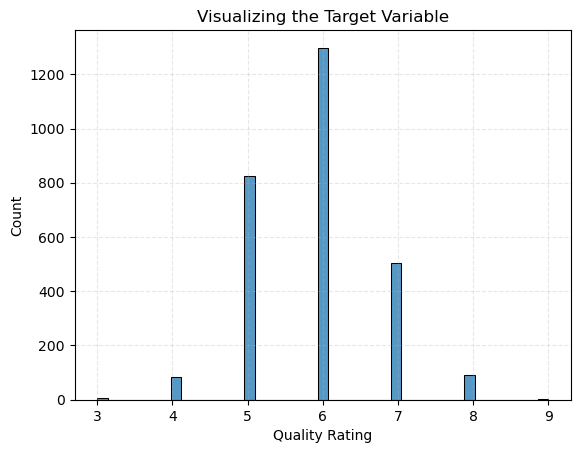

In [5]:
ex.target_viz(train)

# Exploration

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the average alcohol content in low quality wine significantly lower than the alcohol content in high quality wine?</dt>
        <dd>- $H_0$: There is no difference the average alcohol content between wines with quality of less than 5 and wines with quality greater than 7</dd>
        <dd>- $H_a$: The average alcohol content of wines with quality less than 6 is <strong>significantlly lower</strong> than the average alcohol content of wines with quality greater than 6</dd>
    </dl>
</div>

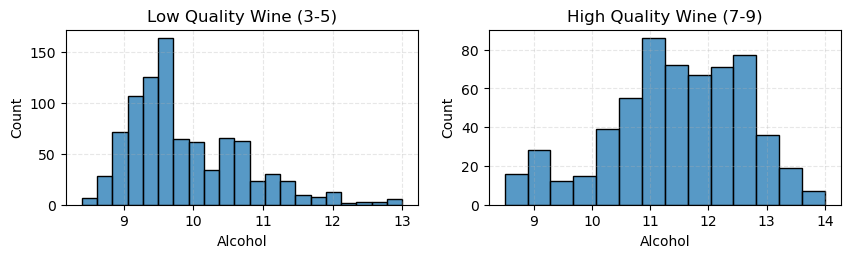

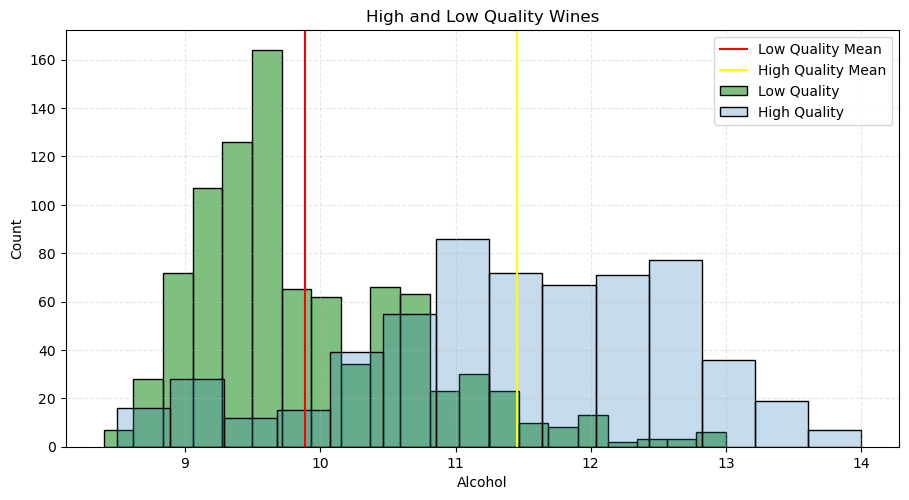

In [6]:
ex.q1_plots(train)

### Independent ttest

In [7]:
ex.q1_stat(train)

The p-value of 1.4328338996461513e-127 is less than the alpha (0.05) so we can reject the null hypothesis!


**Takeaways**
* The p value is lower than alpha
* I can say with confidence that the average alcohol content in low quality wines is significantly lower than the average alcohol content in high quality wines

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Is the average chloride in high quality wine significantly lower than the average chloride for all wines?</dt>
        <dd>- $H_0$: There is no difference the average chloride in wines with quality greater than 6 and the average chloride in all wines</dd>
        <dd>- $H_a$: The average chloride of wines with quality greater than 6 is <strong>significantlly lower</strong> than the average chloride of all wines</dd>
    </dl>
</div>

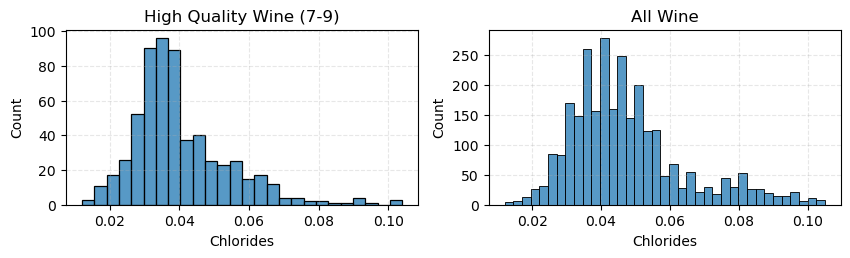

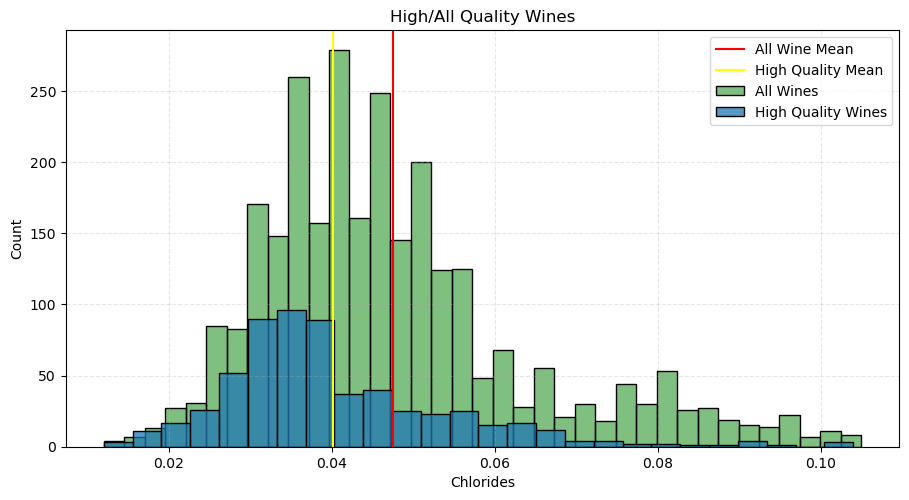

In [8]:
ex.q2_plots(train)

In [9]:
ex.q2_stat(train)

The p-value of 3.596264927934805e-34 is less than the alpha (0.05) so we can reject the null hypothesis!


**Takeaways**
* The p value is lower than alpha
* I can say with confidence that the average amount of chlorides in high quality wine is significantly lower than the average wine in this dataset

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Is the average citric acid in low quality wine significantly lower than the average citric acid in high quality wines?</dt>
        <dd>- $H_0$: There is no difference the average citric acid in wines with  quality lower than 6 and the average citric acid in wines with quality greater than 6</dd>
        <dd>- $H_a$: The average citric acid of wines with  quality lower than 6 is <strong>significantlly lower</strong> than the average citric acid of wines with quality greater than 6</dd>
    </dl>
</div>

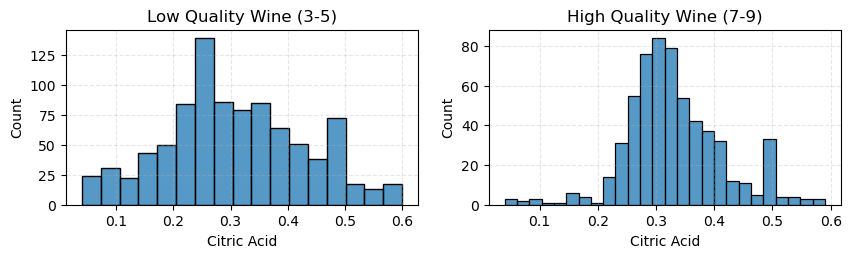

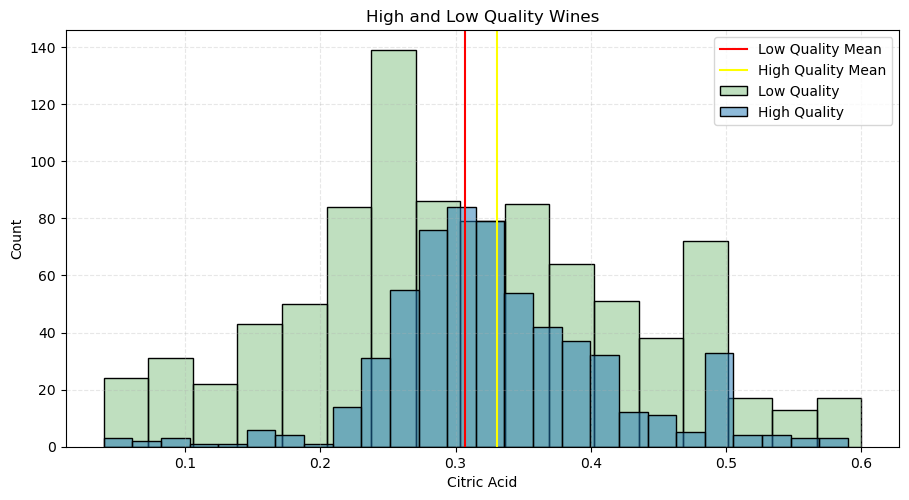

In [10]:
ex.q3_plots(train)

In [11]:
ex.q3_stat(train)

The p-value of 3.943583182973158e-06 is less than the alpha (0.05) so we can reject the null hypothesis!


**Takeaways**
* The p value is lower than alpha
* I can say with confidence that the average amount of citric acid in low quality wine is significantly lower than the average citric acid in high quality wine

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Is the average pH in low quality wine significantly lower than the average pH in high quality wines?</dt>
        <dd>- $H_0$: There is no difference the average pH in wines with  quality lower than 6 and the average pH in wines with quality greater than 6</dd>
        <dd>- $H_a$: The average pH of wines with  quality lower than 6 is <strong>significantlly lower</strong> than the average pH of wines with quality greater than 6</dd>
    </dl>
</div>

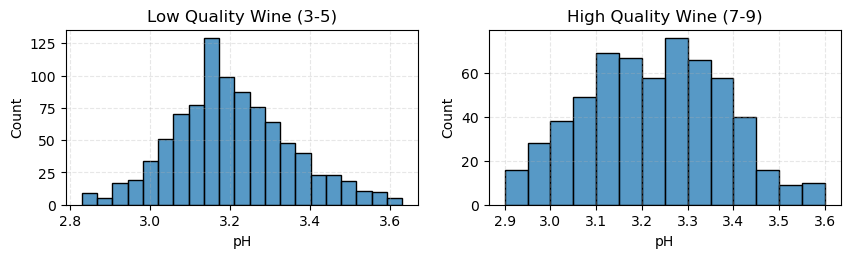

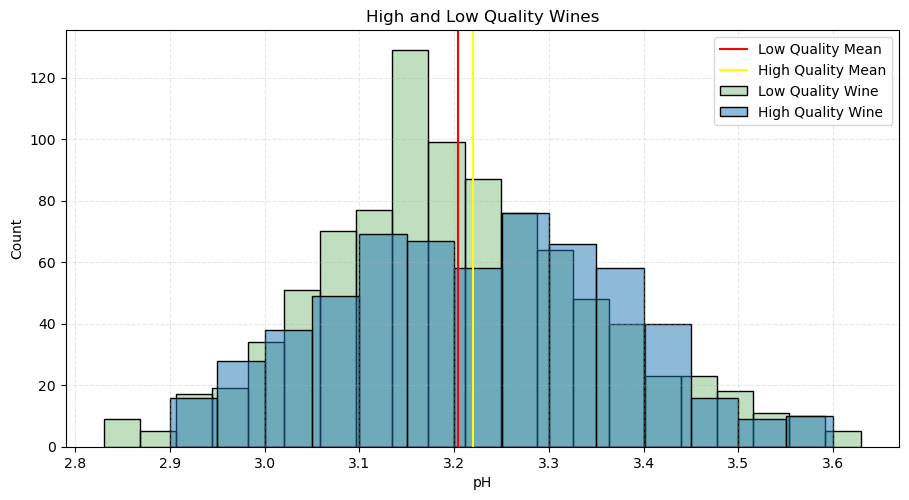

In [12]:
ex.q4_plots(train)

In [13]:
ex.q4_stat(train)

The p-value of 0.023281465582774403 is less than the alpha (0.05) so we can reject the null hypothesis!


**Takeaways**
* The p value is lower than alpha
* I can say with confidence that the average pH in low quality wine is significantly lower than the average pH in high quality wine

<div class="alert alert-info">
    <header>
    <h2>Exploration Takeaways</h2>
    </header>
    <dl>
        <dd>- Mean chloride content in high quality-rated wines is statistically lower but the actually value appears quantifiably small. </dd>
        <dd>- The mean citric acid content of lower-rated wines is statistically lower than that of high-rated wines.</dd>
        <dd>- The pH of low-rated wines trends towards more acidic compared to that of high-rated wines, though the acutal quantifiable amount is small. </dd>
        <dd>- Highest statistical influence appears to be weighted on alcohol content</dd>
    </dl>
</div>

# Clustering and Modeling
* Additional preperation was required for modeling:
    * Dummies were created for the 'color' feature
    * MinMaxScalar was used to scale all other features excluding quality
    * Data was further split into x and y for train, validate, and test sets

In [14]:
x_train, y_train, x_val, y_val, x_test, y_test=mod.mod_prep()

quality column ignored
color column ignored


## Clustering
* Used the elbow method to determine the best number of clusters
* Features were engineered from the clusters for modeling, but they performed worse than the original data.
* Our final model does not contain engineered features from clustering

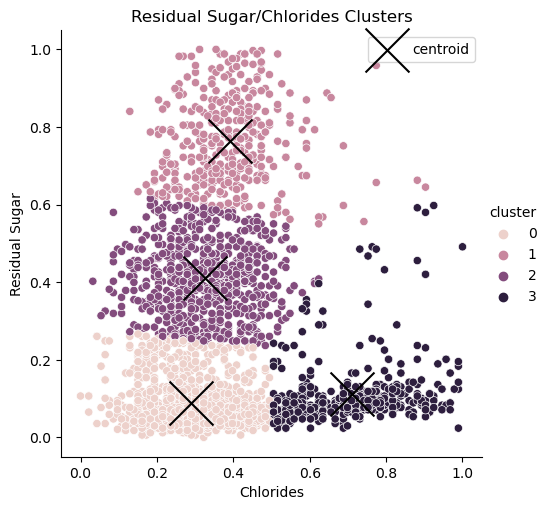

In [15]:
mod.cluster_1(train)

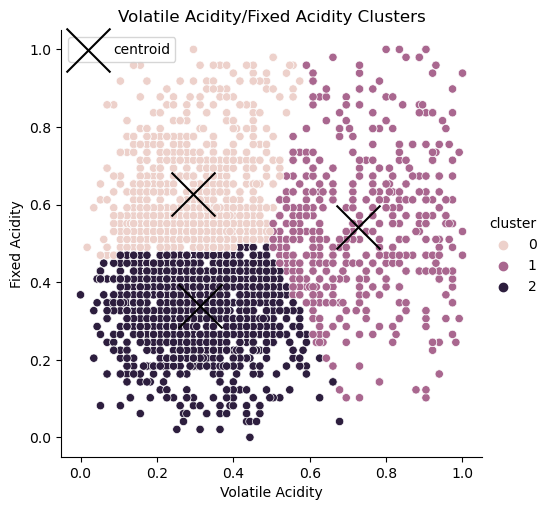

In [16]:
mod.cluster_2(train)

# Modeling
* Used random forest as our model
    * After several models, the best results for in-sample and out-of-sample accuracy was with a max depth of 3 and min samples per leaf of 1
## Calculating Baseline Accuracy

In [17]:
mod.baseline(train, y_train)

Baseline accuracy is 0.46


In [18]:
metrics= mod.model_info()
metrics

quality column ignored
color column ignored


,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,cluster,difference
0,2,1,0.517597,0.491708,residual_sugar_and_chloride,0.025889
1,2,1,0.507643,0.483416,fixed_acidity_and_volatile_acidity,0.024227
2,2,1,0.507288,0.477612,both,0.029676
3,3,1,0.547103,0.524046,none,0.023056


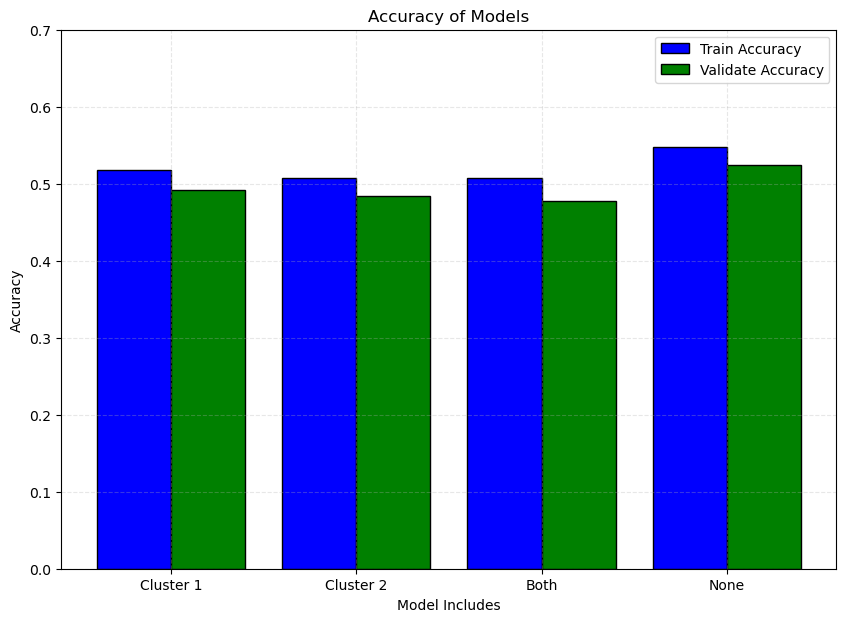

In [19]:
mod.model_viz(metrics)

<div class="alert alert-info">
    <header>
    <h2>Modeling Takeaways</h2>
    </header>
    <dl>
        <dd>- Clustering on acidity and chlorides yielded no significant results in modeling</dd>
        <dd>- Though all tested models operated above baseline. Features engineered from clustering decreased accuracy. </dd>
    </dl>
</div>

In [20]:
mod.model(x_train, y_train, x_val, y_val, x_test, y_test)

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,test_accuracy
0,3,1,0.547103,0.524046,0.513433


<div class="alert alert-info">
    <header>
    <h2>Conclusion</h2>
    </header>
    <dl>
        <dt>Our test data ran similar to our train and validate</dt>
        <dd>- Overall, the model performed very well for being able to predict over 50% on seven different quality values. Especially since quality is determined from the sensory reactions of individuals, which can be highly variable.</dd>
        <dt>Recommendations:</dt>
        <dd>- When predicting quality, I recommend focusing on the quantity of <strong>alcohol</strong>. The amount of alcohol was the most significant driver we found.</dd>
        <dt>Next Steps:</dt>
        <dd>- If I had more time, I would try to cluster using alcohol and density. Perhaps a feature can be generated from these two and incorperated into modeling.</dd>
        <dd>- Research chemical connections between features for clustering and feature engineering.</dd>
        <dd>- Get data on the individuals that gave the quality rating. Determining if an individual rates higher or lower generally could improve model accuracy.</dd>
    </dl>
</div>